In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import glob
import os

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model saving
import joblib

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the path to the 'Lasso Regression' folder in Google Drive
data_path = '/content/drive/MyDrive/Lasso Regression/'  # Update if the folder is nested deeper

# Use glob to retrieve all CSV files in the directory
all_files = glob.glob(os.path.join(data_path, '*.csv'))

# Display the list of files found
print("CSV files found:")
for file in all_files:
    print(os.path.basename(file))

CSV files found:
4. April.csv
3. March.csv
6. June.csv
5. May.csv
7. July.csv
8. August.csv
9. September.csv
10. October.csv
11. November.csv
12. December.csv


In [ ]:
# Initialize an empty list to store individual DataFrames
df_list = []

# Iterate over each CSV file and append to the list
for file in all_files:
    try:
        # Read the CSV file
        df = pd.read_csv(file, parse_dates=['Time'], dayfirst=False)  # Adjust 'dayfirst' if needed

        # Append the DataFrame to the list
        df_list.append(df)

        print(f"Loaded {os.path.basename(file)} successfully.")
    except Exception as e:
        print(f"Error loading {os.path.basename(file)}: {e}")

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(df_list, ignore_index=True)

# Display the shape of the combined DataFrame
print(f"\nCombined data shape: {data.shape}")

# Display the first few rows to verify
display(data.head())

Loaded 4. April.csv successfully.
Loaded 3. March.csv successfully.
Loaded 6. June.csv successfully.
Loaded 5. May.csv successfully.
Loaded 7. July.csv successfully.
Loaded 8. August.csv successfully.
Loaded 9. September.csv successfully.
Loaded 10. October.csv successfully.
Loaded 11. November.csv successfully.
Loaded 12. December.csv successfully.

Combined data shape: (222068, 74)


,Time,TOAL ACTIVE POWER [MW],Irradiation,Temp,Wind,Humidity,Barometer,Weather_Clear,Weather_Partly cloudy,Weather_Partly sunny,...,Weather_Rain. Partly cloudy,Weather_Sprinkles. More clouds than sun,Weather_Sprinkles. Overcast,Weather_Thundershowers. Scattered clouds,Weather_Thunderstorms. Broken clouds,Weather_Thunderstorms. Mostly cloudy,Weather_Light rain. Passing clouds,Weather_Thundershowers. Overcast,Weather_Thundershowers. Partly cloudy,Weather_Thundershowers Partly cloudy
0,2023-04-01 06:22:00,0.012402,17.939816,26.0,5.700000,0.897500,1009.700000,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-01 06:23:00,0.012402,17.939816,26.0,5.716667,0.897083,1009.716667,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-01 06:24:00,0.012402,17.939816,26.0,5.733333,0.896667,1009.733333,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-01 06:25:00,0.012402,17.939816,26.0,5.750000,0.896250,1009.750000,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-01 06:26:00,0.012402,17.939816,26.0,5.766667,0.895833,1009.766667,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the data types
print("\nData types:")
print(data.dtypes)

# Ensure that the 'Time' column is in datetime format
if not np.issubdtype(data['Time'].dtype, np.datetime64):
    data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
    print("\nConverted 'Time' column to datetime.")

# Display summary statistics
print("\nSummary statistics:")
display(data.describe())


Data types:
Time                                     datetime64[ns]
TOAL ACTIVE POWER [MW]                          float64
Irradiation                                     float64
Temp                                            float64
Wind                                            float64
                                              ...      
Weather_Thunderstorms. Mostly cloudy            float64
Weather_Light rain. Passing clouds              float64
Weather_Thundershowers. Overcast                float64
Weather_Thundershowers. Partly cloudy           float64
Weather_Thundershowers Partly cloudy            float64
Length: 74, dtype: object

Summary statistics:


,Time,TOAL ACTIVE POWER [MW],Irradiation,Temp,Wind,Humidity,Barometer,Weather_Clear,Weather_Partly cloudy,Weather_Partly sunny,...,Weather_Rain. Partly cloudy,Weather_Sprinkles. More clouds than sun,Weather_Sprinkles. Overcast,Weather_Thundershowers. Scattered clouds,Weather_Thunderstorms. Broken clouds,Weather_Thunderstorms. Mostly cloudy,Weather_Light rain. Passing clouds,Weather_Thundershowers. Overcast,Weather_Thundershowers. Partly cloudy,Weather_Thundershowers Partly cloudy
count,222068,222068.000000,222068.000000,222068.000000,222068.000000,222068.000000,222068.000000,199695.000000,199695.000000,222068.000000,...,42456.0,21909.000000,42456.0,21909.000000,42456.000000,42456.0,20547.0,20547.0,20547.0,22941.0
mean,2023-07-31 05:03:09.068303616,4.578083,493.880070,29.183439,13.252367,0.780782,1009.915090,0.015348,0.000987,0.122710,...,0.0,0.002739,0.0,0.002739,0.009139,0.0,0.0,0.0,0.0,0.0
min,2023-03-01 06:22:00,0.000000,0.289352,23.000000,0.000000,0.410000,1004.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2023-05-16 11:04:45,1.194352,160.763885,27.833333,8.333333,0.703333,1008.550000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2023-07-29 17:07:30,4.070989,372.048615,29.700000,13.000000,0.771000,1010.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2023-10-14 15:59:15,7.959462,874.131958,31.000000,17.866667,0.851667,1011.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,2023-12-31 17:57:00,11.939230,1577.083374,35.000000,37.000000,1.000000,1016.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
std,NaN,3.531311,386.000202,2.233775,5.838196,0.102077,1.913639,0.122935,0.031393,0.328105,...,0.0,0.052261,0.0,0.052261,0.095161,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check for missing values in the combined dataset
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Time                                          0
TOAL ACTIVE POWER [MW]                        0
Irradiation                                   0
Temp                                          0
Wind                                          0
                                          ...  
Weather_Thunderstorms. Mostly cloudy     179612
Weather_Light rain. Passing clouds       201521
Weather_Thundershowers. Overcast         201521
Weather_Thundershowers. Partly cloudy    201521
Weather_Thundershowers Partly cloudy     199127
Length: 74, dtype: int64


In [ ]:
# Identify columns with missing values
missing_columns = data.columns[data.isnull().any()]
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
Index(['Weather_Clear', 'Weather_Partly cloudy',
       'Weather_Sprinkles Mostly cloudy', 'Weather_Sprinkles Passing clouds',
       'Weather_Sprinkles Scattered clouds',
       'Weather_Strong thunderstorms Broken clouds',
       'Weather_Strong thunderstorms Partly cloudy', 'Weather_Sunny',
       'Weather_Thundershowers.Mostly cloudy',
       'Weather_Thundershowers.Passing clouds',
       'Weather_Thunderstorms.Broken clouds',
       'Weather_Thunderstorms.Partly cloudy',
       'Weather_Thunderstorms.Partly sunny',
       'Weather_Thunderstorms.Passing clouds',
       'Weather_Thunderstorms.Scattered clouds', 'Weather_Warm',
       'Weather_Broken clouds', 'Weather_Drizzle. Partly sunny', 'Weather_Fog',
       'Weather_Mostly cloudy', 'Weather_Overcast',
       'Weather_Rain showers. Passing clouds',
       'Weather_Sprinkles. Partly cloudy', 'Weather_Sprinkles. Partly sunny',
       'Weather_Sprinkles. Passing clouds',
       'Weather_Thundershowers

In [ ]:
# List of numerical columns
numerical_cols = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer']

# Fill missing values in numerical columns with the median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{col}' with median value {median_value}.")

In [ ]:
# List of categorical/weather columns
categorical_cols = [col for col in data.columns if 'Weather_' in col]

# Fill missing values in categorical/weather columns with 0
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(0, inplace=True)
        print(f"Filled missing values in '{col}' with 0.")

Filled missing values in 'Weather_Clear' with 0.
Filled missing values in 'Weather_Partly cloudy' with 0.
Filled missing values in 'Weather_Sprinkles Mostly cloudy' with 0.
Filled missing values in 'Weather_Sprinkles Passing clouds' with 0.
Filled missing values in 'Weather_Sprinkles Scattered clouds' with 0.
Filled missing values in 'Weather_Strong thunderstorms Broken clouds' with 0.
Filled missing values in 'Weather_Strong thunderstorms Partly cloudy' with 0.
Filled missing values in 'Weather_Sunny' with 0.
Filled missing values in 'Weather_Thundershowers.Mostly cloudy' with 0.
Filled missing values in 'Weather_Thundershowers.Passing clouds' with 0.
Filled missing values in 'Weather_Thunderstorms.Broken clouds' with 0.
Filled missing values in 'Weather_Thunderstorms.Partly cloudy' with 0.
Filled missing values in 'Weather_Thunderstorms.Partly sunny' with 0.
Filled missing values in 'Weather_Thunderstorms.Passing clouds' with 0.
Filled missing values in 'Weather_Thunderstorms.Scatter

In [ ]:
# Check for remaining missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Time                                     0
TOAL ACTIVE POWER [MW]                   0
Irradiation                              0
Temp                                     0
Wind                                     0
                                        ..
Weather_Thunderstorms. Mostly cloudy     0
Weather_Light rain. Passing clouds       0
Weather_Thundershowers. Overcast         0
Weather_Thundershowers. Partly cloudy    0
Weather_Thundershowers Partly cloudy     0
Length: 74, dtype: int64


In [ ]:
# Identify columns with missing values
missing_columns = data.columns[data.isnull().any()]
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
Index([], dtype='object')


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
import glob
import os

In [ ]:
# Display summary of the cleaned data
print("Cleaned Data Shape:", data.shape)
display(data.head())

Cleaned Data Shape: (222068, 74)


,Time,TOAL ACTIVE POWER [MW],Irradiation,Temp,Wind,Humidity,Barometer,Weather_Clear,Weather_Partly cloudy,Weather_Partly sunny,...,Weather_Rain. Partly cloudy,Weather_Sprinkles. More clouds than sun,Weather_Sprinkles. Overcast,Weather_Thundershowers. Scattered clouds,Weather_Thunderstorms. Broken clouds,Weather_Thunderstorms. Mostly cloudy,Weather_Light rain. Passing clouds,Weather_Thundershowers. Overcast,Weather_Thundershowers. Partly cloudy,Weather_Thundershowers Partly cloudy
0,2023-04-01 06:22:00,0.012402,17.939816,26.0,5.700000,0.897500,1009.700000,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-04-01 06:23:00,0.012402,17.939816,26.0,5.716667,0.897083,1009.716667,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-04-01 06:24:00,0.012402,17.939816,26.0,5.733333,0.896667,1009.733333,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-04-01 06:25:00,0.012402,17.939816,26.0,5.750000,0.896250,1009.750000,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-04-01 06:26:00,0.012402,17.939816,26.0,5.766667,0.895833,1009.766667,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create DataFrame copies for 15-minute and 60-minute ahead forecasts
df_15min = data.copy()
df_60min = data.copy()

# Shift the 'TOAL ACTIVE POWER [MW]' column to create target variables for forecasting
df_15min['Target_15min'] = df_15min['TOAL ACTIVE POWER [MW]'].shift(-15)
df_60min['Target_60min'] = df_60min['TOAL ACTIVE POWER [MW]'].shift(-60)

# Drop any rows with missing target values after shifting
df_15min = df_15min.dropna(subset=['Target_15min'])
df_60min = df_60min.dropna(subset=['Target_60min'])

# Display the shapes of the new DataFrames
print("15-minute ahead forecast data shape:", df_15min.shape)
print("60-minute ahead forecast data shape:", df_60min.shape)

15-minute ahead forecast data shape: (222053, 75)
60-minute ahead forecast data shape: (222008, 75)


In [ ]:
# Define feature columns (exclude 'Time' and target columns)
feature_cols = ['Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer'] + [col for col in data.columns if 'Weather_' in col]

# Split data for 15-minute forecast
X_15min = df_15min[feature_cols]
y_15min = df_15min['Target_15min']

X_train_15min, X_test_15min, y_train_15min, y_test_15min = train_test_split(X_15min, y_15min, test_size=0.2, random_state=42)

# Split data for 60-minute forecast
X_60min = df_60min[feature_cols]
y_60min = df_60min['Target_60min']

X_train_60min, X_test_60min, y_train_60min, y_test_60min = train_test_split(X_60min, y_60min, test_size=0.2, random_state=42)

# Display shapes
print("Training data shapes:")
print("15-minute forecast:", X_train_15min.shape, y_train_15min.shape)
print("60-minute forecast:", X_train_60min.shape, y_train_60min.shape)

Training data shapes:
15-minute forecast: (177642, 72) (177642,)
60-minute forecast: (177606, 72) (177606,)


In [ ]:
# Standardize the feature data for both forecasts
scaler = StandardScaler()

X_train_15min_scaled = scaler.fit_transform(X_train_15min)
X_test_15min_scaled = scaler.transform(X_test_15min)

X_train_60min_scaled = scaler.fit_transform(X_train_60min)
X_test_60min_scaled = scaler.transform(X_test_60min)

In [ ]:
# Define Lasso model and hyperparameter grid
lasso_15min = Lasso(max_iter=10000)
param_grid = {'alpha': np.logspace(-4, 0, 50)}  # Range of alpha values

# Grid search with cross-validation
grid_search_15min = GridSearchCV(lasso_15min, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_15min.fit(X_train_15min_scaled, y_train_15min)

# Best model
best_lasso_15min = grid_search_15min.best_estimator_

# Predictions
y_pred_15min = best_lasso_15min.predict(X_test_15min_scaled)

# Evaluation metrics
mse_15min = mean_squared_error(y_test_15min, y_pred_15min)
rmse_15min = np.sqrt(mse_15min)
mae_15min = mean_absolute_error(y_test_15min, y_pred_15min)
r2_15min = r2_score(y_test_15min, y_pred_15min)

# Display evaluation metrics
print("15-Minute Forecast Evaluation Metrics:")
print(f"MSE: {mse_15min:.4f}")
print(f"RMSE: {rmse_15min:.4f}")
print(f"MAE: {mae_15min:.4f}")
print(f"R^2: {r2_15min:.4f}")

15-Minute Forecast Evaluation Metrics:
MSE: 7.7527
RMSE: 2.7844
MAE: 2.2646
R^2: 0.3800


In [ ]:
print(f"Best alpha 15_min: {grid_search_15min.best_params_['alpha']}")

Best alpha 15_min: 0.0001


In [ ]:
# Define Lasso model and hyperparameter grid
lasso_60min = Lasso(max_iter=10000)
grid_search_60min = GridSearchCV(lasso_60min, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_60min.fit(X_train_60min_scaled, y_train_60min)

# Best model
best_lasso_60min = grid_search_60min.best_estimator_

# Predictions
y_pred_60min = best_lasso_60min.predict(X_test_60min_scaled)

# Evaluation metrics
mse_60min = mean_squared_error(y_test_60min, y_pred_60min)
rmse_60min = np.sqrt(mse_60min)
mae_60min = mean_absolute_error(y_test_60min, y_pred_60min)
r2_60min = r2_score(y_test_60min, y_pred_60min)

# Display evaluation metrics
print("60-Minute Forecast Evaluation Metrics:")
print(f"MSE: {mse_60min:.4f}")
print(f"RMSE: {rmse_60min:.4f}")
print(f"MAE: {mae_60min:.4f}")
print(f"R^2: {r2_60min:.4f}")

60-Minute Forecast Evaluation Metrics:
MSE: 9.0165
RMSE: 3.0028
MAE: 2.5444
R^2: 0.2747


In [ ]:
print(f"Best alpha 60_min: {grid_search_60min.best_params_['alpha']}")

Best alpha 60_min: 0.0005428675439323859


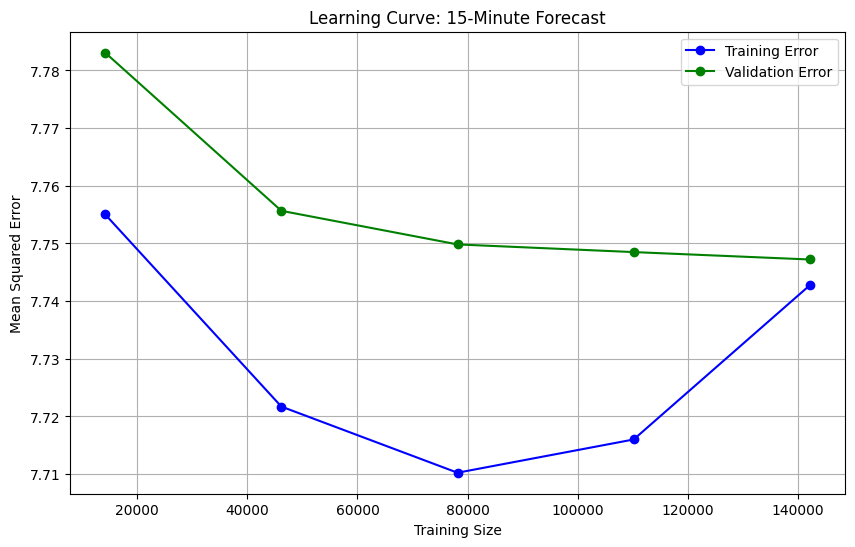

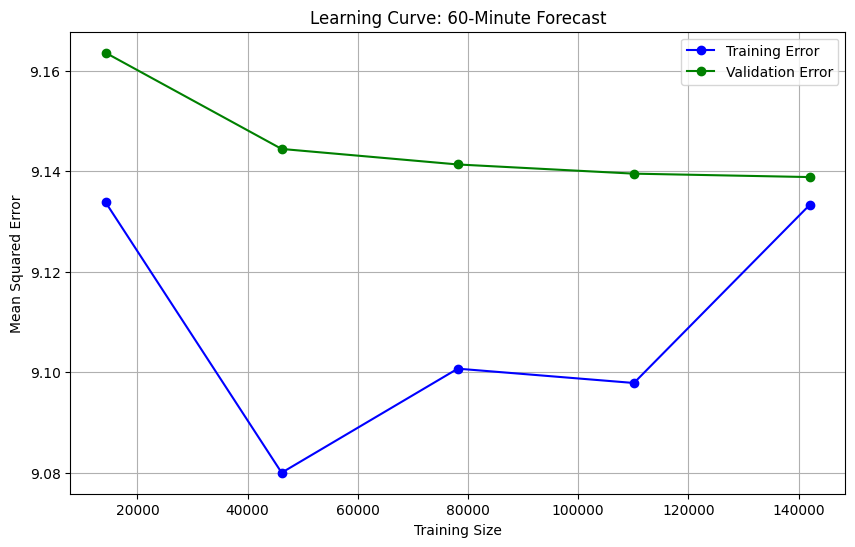

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o', color='green')
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot learning curve for 15-minute forecast
plot_learning_curve(best_lasso_15min, X_train_15min_scaled, y_train_15min, '15-Minute Forecast')

# Plot learning curve for 60-minute forecast
plot_learning_curve(best_lasso_60min, X_train_60min_scaled, y_train_60min, '60-Minute Forecast')

Improved 15-Minute Forecast Evaluation Metrics:
MSE: 6.7230
RMSE: 2.5929
MAE: 2.0888
R^2: 0.3980
Improved 60-Minute Forecast Evaluation Metrics:
MSE: 8.7725
RMSE: 2.9618
MAE: 2.5741
R^2: 0.2146


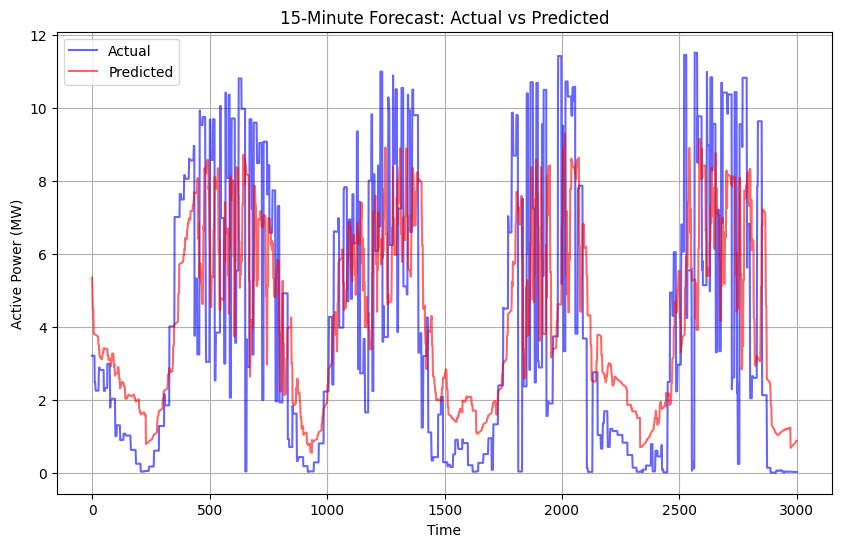

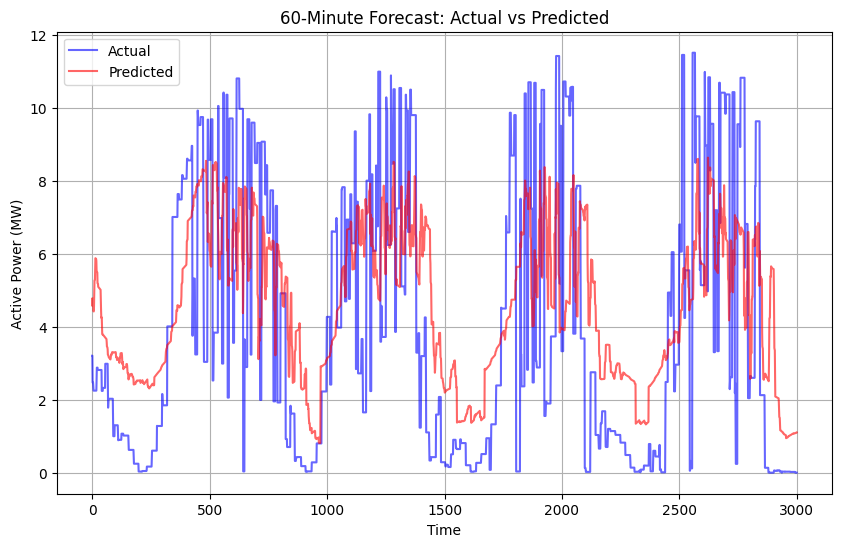

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Feature Engineering: Add lagged features for better predictions ---
def add_lagged_features(data, lag_steps):
    for lag in range(1, lag_steps + 1):
        data[f'Lag_{lag}'] = data['TOAL ACTIVE POWER [MW]'].shift(lag)
    return data

# Add lagged features for both datasets
df_15min = add_lagged_features(df_15min, lag_steps=5)  # 5 lagged steps
df_60min = add_lagged_features(df_60min, lag_steps=5)  # 5 lagged steps

# Drop rows with NaN values introduced by lagged features
df_15min.dropna(inplace=True)
df_60min.dropna(inplace=True)

# Updated feature columns to include lagged features
feature_cols = [col for col in df_15min.columns if col.startswith('Lag_')] + [
    'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer'
] + [col for col in df_15min.columns if 'Weather_' in col]

# --- Split Data for 15-minute and 60-minute Forecasts ---
X_15min = df_15min[feature_cols]
y_15min = df_15min['Target_15min']

X_60min = df_60min[feature_cols]
y_60min = df_60min['Target_60min']

# Train-Test Split
X_train_15min, X_test_15min, y_train_15min, y_test_15min = train_test_split(
    X_15min, y_15min, test_size=0.2, shuffle=False
)
X_train_60min, X_test_60min, y_train_60min, y_test_60min = train_test_split(
    X_60min, y_60min, test_size=0.2, shuffle=False
)

# Standardize Data
scaler_15min = StandardScaler()
X_train_15min_scaled = scaler_15min.fit_transform(X_train_15min)
X_test_15min_scaled = scaler_15min.transform(X_test_15min)

scaler_60min = StandardScaler()
X_train_60min_scaled = scaler_60min.fit_transform(X_train_60min)
X_test_60min_scaled = scaler_60min.transform(X_test_60min)

# --- Define Models and Improved Hyperparameter Tuning ---
lasso_15min_2 = Lasso(max_iter=10000)
lasso_60min_2 = Lasso(max_iter=10000)

# Use TimeSeriesSplit for better handling of time series data
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search for hyperparameter tuning
param_grid = {'alpha': np.logspace(-5, 1, 100)}  # Expand the search space for alpha

# Grid search with cross-validation for the 15-minute model
grid_search_15min_2 = GridSearchCV(
    lasso_15min_2, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1
)
grid_search_15min_2.fit(X_train_15min_scaled, y_train_15min)

# Best model for 15-minute forecast
lasso_15min_2_best = grid_search_15min_2.best_estimator_

# Grid search with cross-validation for the 60-minute model
grid_search_60min_2 = GridSearchCV(
    lasso_60min_2, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1
)
grid_search_60min_2.fit(X_train_60min_scaled, y_train_60min)

# Best model for 60-minute forecast
lasso_60min_2_best = grid_search_60min_2.best_estimator_

# --- Model Evaluation ---
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2: {r2:.4f}")

    return y_pred

# Evaluate 15-minute forecast model
y_pred_15min_2 = evaluate_model(lasso_15min_2_best, X_test_15min_scaled, y_test_15min, "Improved 15-Minute Forecast")

# Evaluate 60-minute forecast model
y_pred_60min_2 = evaluate_model(lasso_60min_2_best, X_test_60min_scaled, y_test_60min, "Improved 60-Minute Forecast")

# --- Visualizations ---
# Actual vs Predicted for Test Set
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values[:3000], label="Actual", color="blue", alpha=0.6)
    plt.plot(y_pred[:3000], label="Predicted", color="red", alpha=0.6)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Active Power (MW)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for 15-minute forecast
plot_actual_vs_predicted(y_test_15min, y_pred_15min_2, "15-Minute Forecast: Actual vs Predicted")

# Plot results for 60-minute forecast
plot_actual_vs_predicted(y_test_60min, y_pred_60min_2, "60-Minute Forecast: Actual vs Predicted")

In [ ]:
print(f"Best alpha_2 15_min: {grid_search_15min_2.best_params_['alpha']}")
print(f"Best alpha_2 60_min: {grid_search_60min_2.best_params_['alpha']}")

Best alpha_2 15_min: 0.02848035868435802
Best alpha_2 60_min: 0.03274549162877728


In [ ]:
# Function to plot learning curve
def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='green', marker='o')
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Function to plot actual vs. predicted for the test set
def plot_actual_vs_predicted(y_test, y_pred, title, subset_size=None):
    if subset_size:
        y_test = y_test[:subset_size]
        y_pred = y_pred[:subset_size]
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_test)), y_test, label="Actual Power", color="blue", alpha=0.7)
    plt.plot(range(len(y_pred)), y_pred, label="Predicted Power", color="orange", linestyle="dashed")
    plt.xlabel("Sample Index")
    plt.ylabel("Power Output")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, feature_names, title):
    coefficients = model.coef_
    important_features_indices = np.where(coefficients != 0)[0]
    important_features = [feature_names[i] for i in important_features_indices]
    important_coefficients = coefficients[important_features_indices]

    # Sort by absolute importance for better visualization
    sorted_indices = np.argsort(np.abs(important_coefficients))[::-1]
    sorted_features = [important_features[i] for i in sorted_indices]
    sorted_coefficients = important_coefficients[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_coefficients, color="skyblue")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title(title)
    plt.grid(True)
    plt.show()

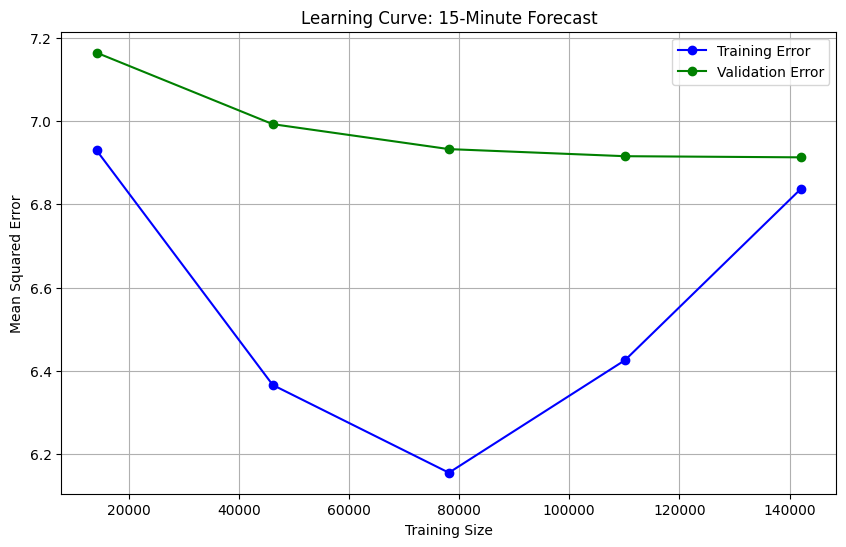

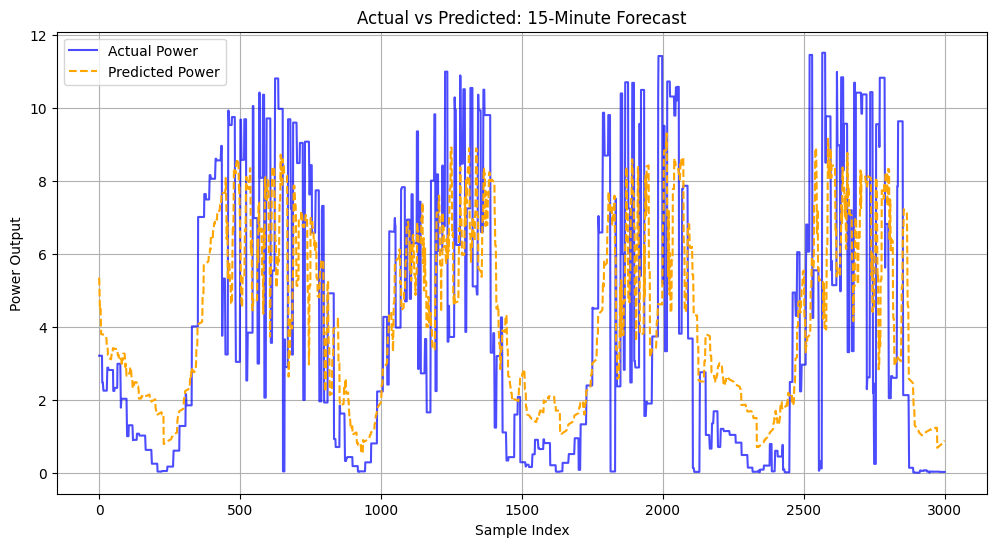

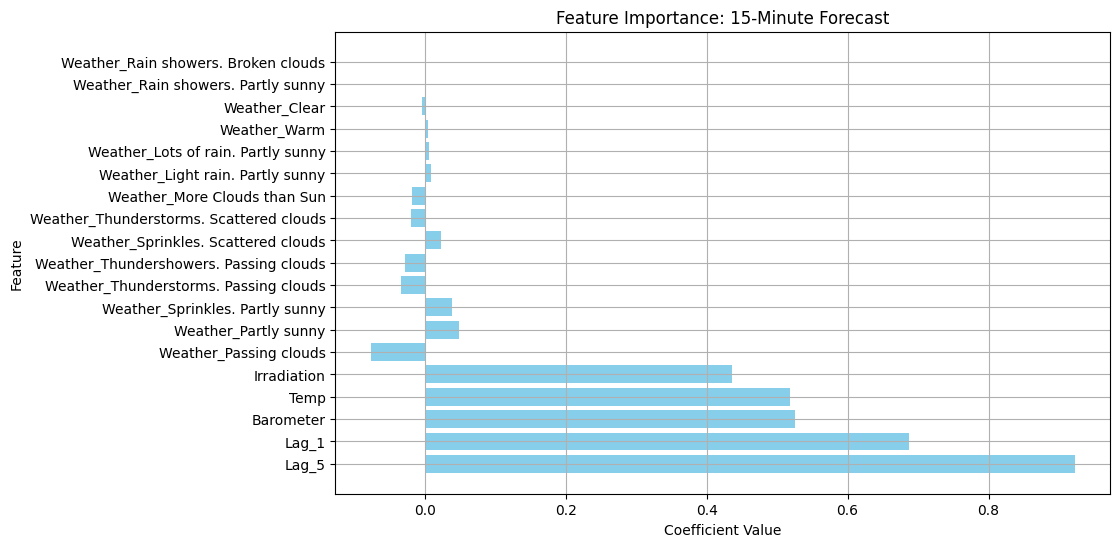

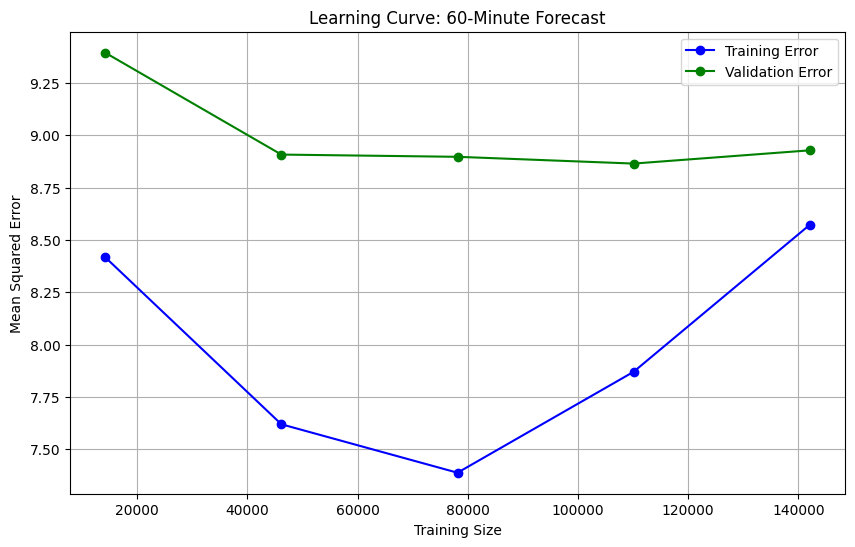

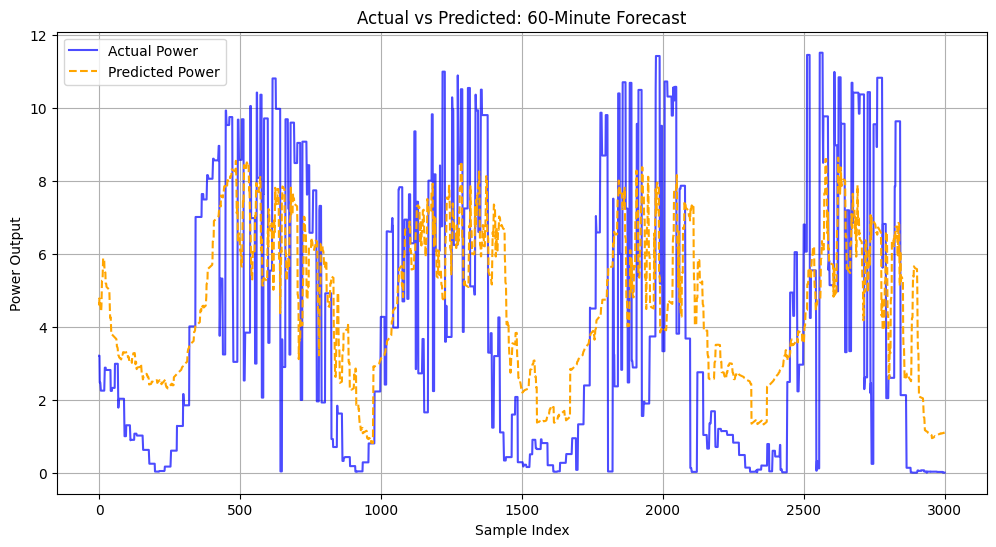

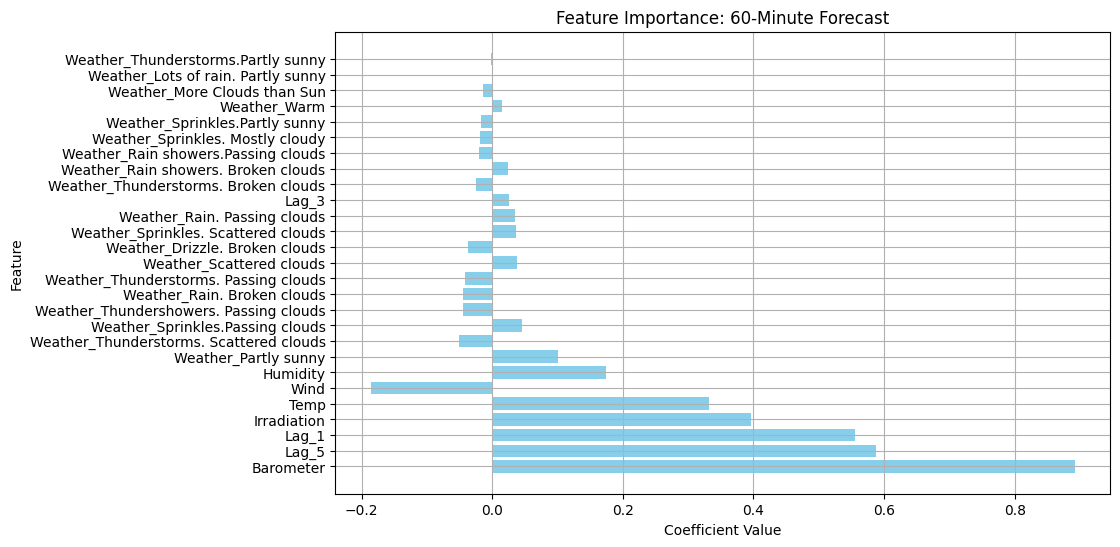

In [ ]:
# Evaluate and plot for each model
feature_names = feature_cols  # Feature names

# **Model 1: 15-Minute Forecast**
plot_learning_curve(lasso_15min_2_best, X_train_15min_scaled, y_train_15min, "15-Minute Forecast") # Use the fitted model: lasso_15min_2_best
plot_actual_vs_predicted(y_test_15min, y_pred_15min_2, "Actual vs Predicted: 15-Minute Forecast", subset_size=3000)
plot_feature_importance(lasso_15min_2_best, feature_names, "Feature Importance: 15-Minute Forecast") # Use the fitted model: lasso_15min_2_best

# **Model 2: 60-Minute Forecast**
plot_learning_curve(lasso_60min_2_best, X_train_60min_scaled, y_train_60min, "60-Minute Forecast") # Use the fitted model: lasso_60min_2_best
plot_actual_vs_predicted(y_test_60min, y_pred_60min_2, "Actual vs Predicted: 60-Minute Forecast", subset_size=3000)
plot_feature_importance(lasso_60min_2_best, feature_names, "Feature Importance: 60-Minute Forecast") # Use the fitted model: lasso_60min_2_best

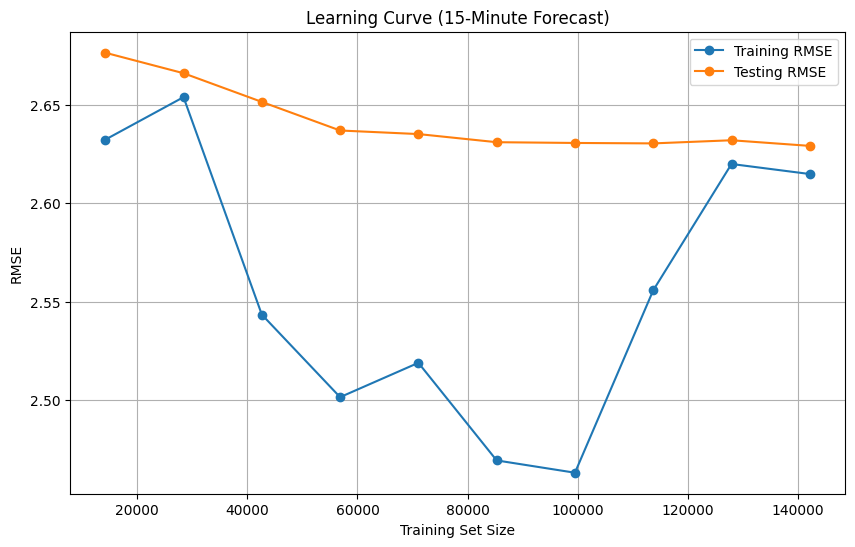

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Plot the Learning Curve for the 15-Minute Model
train_sizes, train_scores, test_scores = learning_curve(
    lasso_15min_2_best, X_train_15min_scaled, y_train_15min,
    cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, marker='o', label='Training RMSE')
plt.plot(train_sizes, test_rmse, marker='o', label='Testing RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve (15-Minute Forecast)')
plt.legend()
plt.grid(True)
plt.show()

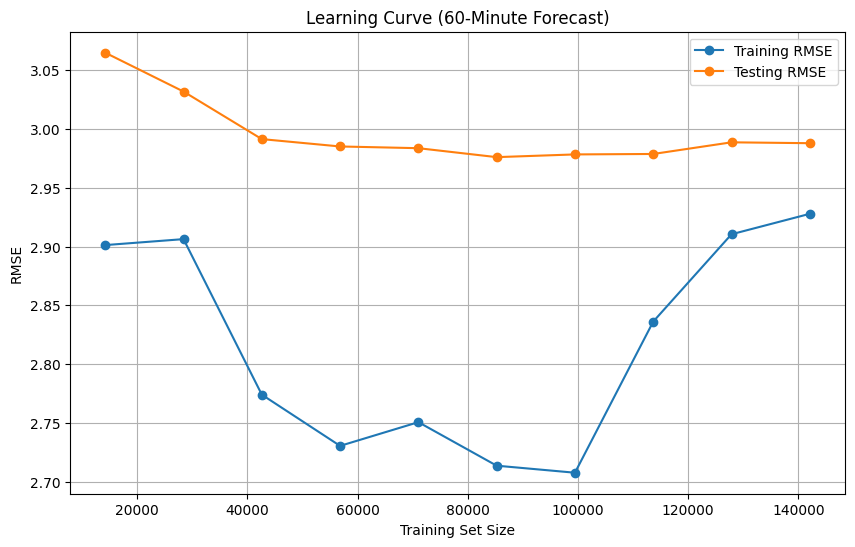

In [ ]:
# Plot the Learning Curve for the 60-Minute Model
train_sizes, train_scores, test_scores = learning_curve(
    lasso_60min_2_best, X_train_60min_scaled, y_train_60min,
    cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, marker='o', label='Training RMSE')
plt.plot(train_sizes, test_rmse, marker='o', label='Testing RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve (60-Minute Forecast)')
plt.legend()
plt.grid(True)
plt.show()


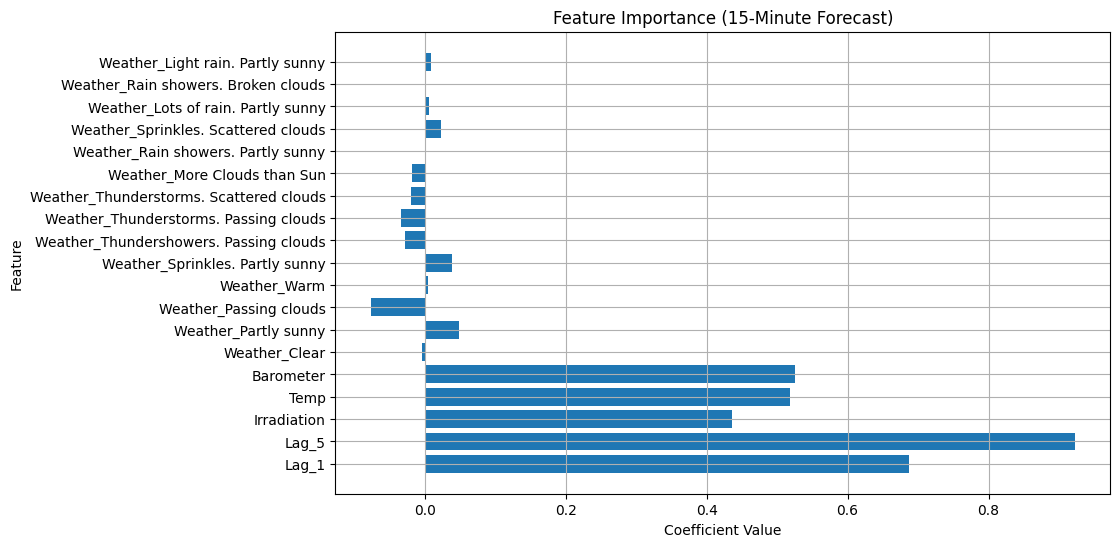

In [ ]:
# Plot Feature Importance for 15-Minute Model
coefficients = lasso_15min_2_best.coef_
important_features_indices = np.where(coefficients != 0)[0]
important_features = [feature_names[i] for i in important_features_indices]

plt.figure(figsize=(10, 6))
plt.barh(important_features, coefficients[important_features_indices])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (15-Minute Forecast)')
plt.grid(True)
plt.show()

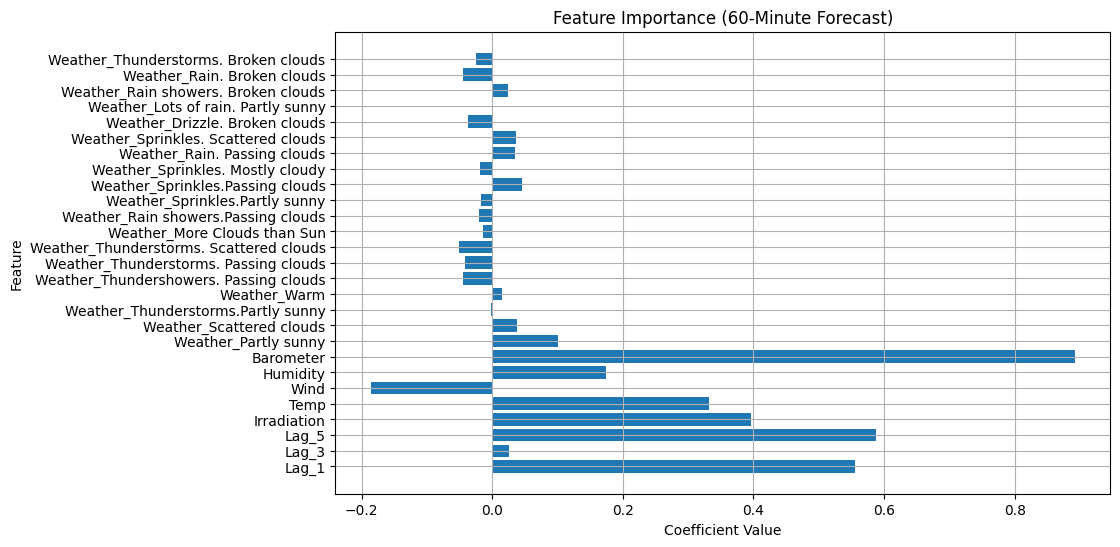

In [ ]:
# Plot Feature Importance for 60-Minute Model
coefficients = lasso_60min_2_best.coef_
important_features_indices = np.where(coefficients != 0)[0]
important_features = [feature_names[i] for i in important_features_indices]

plt.figure(figsize=(10, 6))
plt.barh(important_features, coefficients[important_features_indices])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (60-Minute Forecast)')
plt.grid(True)
plt.show()

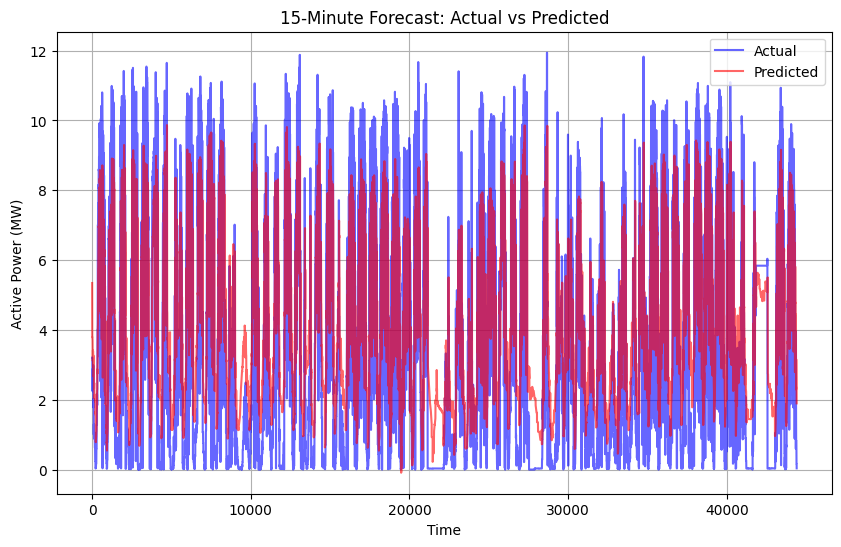

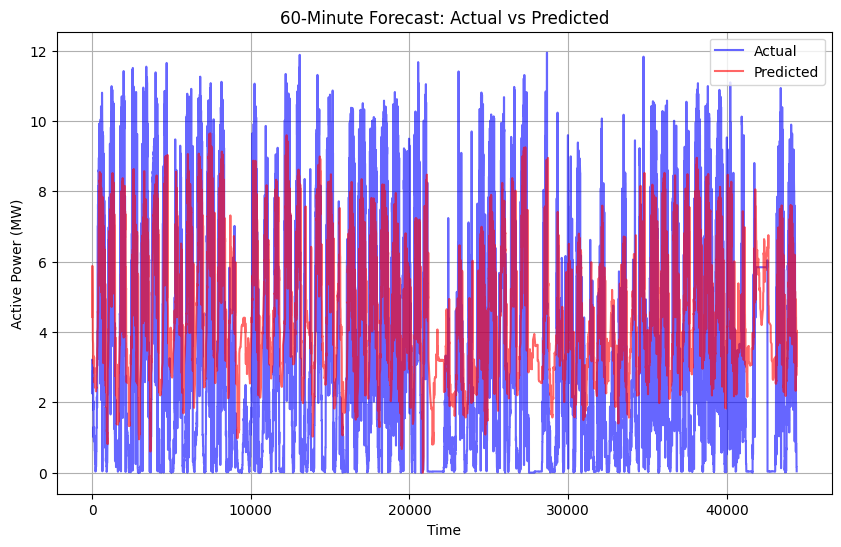

In [ ]:
# --- Visualizations ---
# Actual vs Predicted for Test Set
def plot_actual_vs_predicted_full(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Actual", color="blue", alpha=0.6)
    plt.plot(y_pred, label="Predicted", color="red", alpha=0.6)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Active Power (MW)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for 15-minute forecast (Entire Test Set)
plot_actual_vs_predicted_full(y_test_15min, y_pred_15min_2, "15-Minute Forecast: Actual vs Predicted")

# Plot results for 60-minute forecast (Entire Test Set)
plot_actual_vs_predicted_full(y_test_60min, y_pred_60min_2, "60-Minute Forecast: Actual vs Predicted")